### Linear Regression

Problem

• Data were collected from a sample of 10 Ice cream vendors located near
college campuses.


• For the ith observation or restaurant in the sample, xi is the size of the
 student population (in thousands) and yi is the quarterly sales (in thousands of dollars).
 

• The values of xi and yi for the 10 restaurants in the sample are summarized in Table

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('lrm.xlsx')
data

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


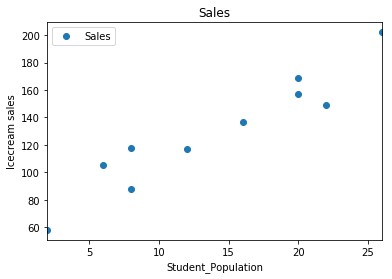

In [3]:
data.plot('Student_Population','Sales',style='o')
plt.ylabel('Icecream sales')
plt.title('Sales')
plt.show()

In [4]:
import statsmodels.api as s
St_pop = data['Student_Population']
sales= data['Sales']
st_pop = s.add_constant(St_pop)
model1=sm.OLS(sales,st_pop)
result1= model1.fit()
print(result1.summary())

/home/ishika/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           2.55e-05
Time:                        01:22:35   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9

/home/ishika/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


#### Regression equation is: y = 60+ 5*x

Sales = 60 + 5 * (Student_Population)

The point estimate for an individual value of y is the same
as the point estimate for the mean value of y.

In [5]:
x= data['Student_Population'].values.reshape(-1,1)
y= data['Sales'].values.reshape(-1,1)
reg= LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
reg.intercept_[0]

60.0

In [7]:
reg.coef_[0][0]

5.0

In [18]:
reg.predict([[10]])

array([[110.]])

In [17]:
rsq= reg.score(x,y)
rsq

0.9027336300063573

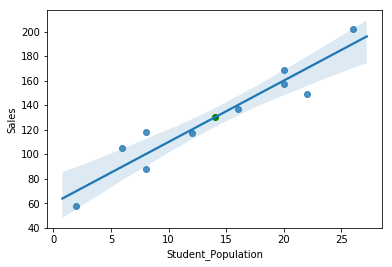

In [22]:
x1=data['Student_Population']
y1=data['Sales']
plt.figure()
sns.regplot(x1,y1,fit_reg=True)
plt.scatter(np.mean(x1),np.mean(y1),color="green")

 • Confidence interval, is an interval estimate of the mean value of y for a
given value of x.

• Prediction interval, is used whenever we want an interval estimate of an
individual value of y for a given value of x.

• The point estimate of the mean value of y is the same as the point
estimate of an individual value of y.

• The margin of error is larger for a prediction interval.

Confidence intervals vs prediction intervals

• Confidence intervals and prediction intervals show the precision of the
regression results.


• Narrower intervals provide a higher degree of precision

In [24]:
from statsmodels.stats.outliers_influence import summary_table
st,data1,ss2= summary_table(result1,alpha=0.05)
fittedvalues= data1[:,2]
predict_mean_se= data1[:,3]
predict_mean_ci_low ,predict_mean_ci_upp= data1[:,4:6].T
predict_ci_low, predict_ci_up = data1[:,6:8].T

In [31]:
#lower limit of confidence interval
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [32]:
#upper limit of confidence interval
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [33]:
#lower limit of prediction interval
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [34]:
#upper limit of prediction interval
predict_ci_up

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

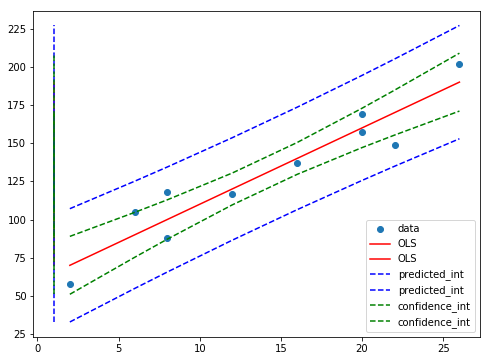

In [36]:
X= s.add_constant(x)
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label="data")
ax.plot(X,fittedvalues,'r-',label='OLS')
ax.plot(X,predict_ci_low,'b--',label='predicted_int')
ax.plot(X,predict_ci_up,'b--')
ax.plot(X,predict_mean_ci_low,'g--',label='confidence_int')
ax.plot(X,predict_mean_ci_upp,'g--')
ax.legend(loc='best')
plt.show()
